In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
from import_data import get_data, read_processed_files, get_solar_actual, get_solar_estimate
from environment import market_env
from actor_critic import ActorCriticAgent
from utils import plot_learning_curve
import numpy as np

# Get Data

In [ ]:
get_data()

In [ ]:
df_demand, df_demand_scaled, df_vre, df_vre_scaled, df_gen, df_gen_scaled, df_solar_cap_forecast, df_solar_cap_actual, df_mcp = read_processed_files()

# RL Agent

In [454]:
# Example usage
env = market_env(demand=df_demand_scaled, re=df_vre_scaled, capacity_forecast= df_solar_cap_forecast, capacity_actual=df_solar_cap_actual, prices=df_mcp, eps_length=11, capacity=200, mc=30)

/Users/louis.skowronek/miniforge3/envs/bda_env/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [455]:
input_size = env.observation_space.shape[0]
n_actions_prc = env.action_space[0].n
n_actions_vol = env.action_space[1].n
n_games = 2000

agent = ActorCriticAgent(input_size, n_actions_prc, n_actions_vol)

best_score = env.reward_range[0]
score_history = []
reward_history = []

In [456]:
load_checkpoint = False
if load_checkpoint:
    agent.load_models()

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0


    while not done:

        action = agent.choose_action(observation)

        observation_next, reward, done, _ = env.step(action)
        score += reward
        if not load_checkpoint:
            agent.update(observation, reward, observation_next, done)
        observation = observation_next

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        if not load_checkpoint:
            agent.save_models()

    print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

... saving models ...
episode  0 score -7.9 avg_score -7.9
... saving models ...
episode  1 score -6.9 avg_score -7.4
... saving models ...
episode  2 score 4.9 avg_score -3.3
... saving models ...
episode  3 score 49.3 avg_score 9.8
episode  4 score 0.6 avg_score 8.0
... saving models ...
episode  5 score 37.9 avg_score 13.0
... saving models ...
episode  6 score 23.7 avg_score 14.5
episode  7 score -6.4 avg_score 11.9
episode  8 score -7.8 avg_score 9.7
episode  9 score -41.7 avg_score 4.6
episode  10 score -11.8 avg_score 3.1
episode  11 score 35.7 avg_score 5.8
episode  12 score -31.6 avg_score 2.9
episode  13 score -36.6 avg_score 0.1
episode  14 score -11.2 avg_score -0.7
episode  15 score 52.6 avg_score 2.7
episode  16 score 20.3 avg_score 3.7
episode  17 score 46.6 avg_score 6.1
episode  18 score -26.9 avg_score 4.3
episode  19 score 13.5 avg_score 4.8
episode  20 score 56.9 avg_score 7.3
episode  21 score 10.4 avg_score 7.4
episode  22 score 31.7 avg_score 8.5
episode  23 scor

In [440]:
env.profit, env.net_profit.item(), env.reward, env.da_price, env.bid_price, env.bid_volume

(5797.3877551020405,
 5797.3877551020405,
 8.665335184634515,
 385.09,
 30,
 16.3265306122449)

In [457]:
env.results_ep

,reward,profit,net_profit,delta,market price,bid price,bid volume,actual volume
2020-11-08 10:00:00+01:00,3.082659,20.816327,20.816327,909.766581,32.55,30.0,8.163265,31.454780
2020-11-08 11:00:00+01:00,3.411350,29.306122,29.306122,1184.407483,33.59,30.0,8.163265,37.547196
2020-11-08 12:00:00+01:00,3.443162,30.285714,30.285714,1191.867712,33.71,30.0,8.163265,37.627018
2020-11-08 13:00:00+01:00,3.332933,27.020408,27.020408,956.432186,33.31,30.0,8.163265,32.090819
2020-11-08 14:00:00+01:00,3.443162,30.285714,30.285714,530.190546,33.71,30.0,8.163265,21.269924
...,...,...,...,...,...,...,...,...
2023-01-17 16:00:00+01:00,-5.655095,1224.897959,-284.743647,-1509.641606,180.05,30.0,8.163265,1.176125
2023-01-17 17:00:00+01:00,-6.317172,1296.571429,-553.004157,-1849.575586,188.83,30.0,8.163265,0.000828
2023-01-17 18:00:00+01:00,-6.281733,1199.183673,-533.714286,-1732.897959,176.90,30.0,8.163265,0.000000
2023-01-17 19:00:00+01:00,-6.277633,1188.244898,-531.526531,-1719.771429,175.56,30.0,8.163265,0.000000


<Axes: >

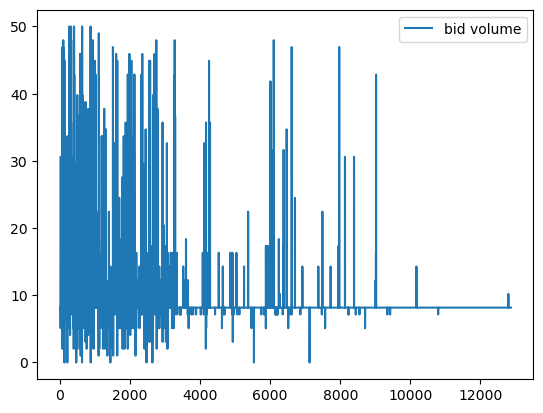

In [458]:
env.results_ep.reset_index().plot(y='bid volume')

In [326]:
env.results_ep.loc[env.date] = env.net_profit.item(), env.profit, env.net_profit.flatten(), env.delta.flatten(), env.da_price, env.bid_price, env.bid_volume

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (7,) + inhomogeneous part.

In [323]:
env.net_profit.item(), env.profit, env.net_profit, env.delta, env.da_price, env.bid_price, env.bid_volume

(-4542.666666666667,
 0,
 array([-4542.66666667]),
 array([-4542.66666667]),
 34.07,
 42.0,
 111.11111111111111)

In [34]:
env.results_ep.describe()

,reward,market price,bid price,bid volume
count,17712.000000,17712.000000,17712.000000,17712.000000
mean,6.861661,104.355064,36.047595,173.079268
std,4.044712,113.561759,16.222378,26.591149
min,-8.039300,-129.960000,0.000000,0.000000
25%,6.366425,35.370000,33.000000,180.000000
50%,8.428700,58.195000,33.000000,180.000000
75%,9.750675,130.840000,33.000000,180.000000
max,11.902300,850.000000,147.000000,180.000000


<Axes: >

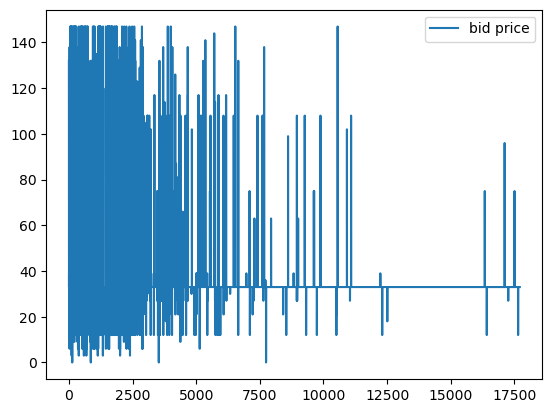

In [36]:
env.results_ep.reset_index().plot(y=['bid price', 'bid_volume'])

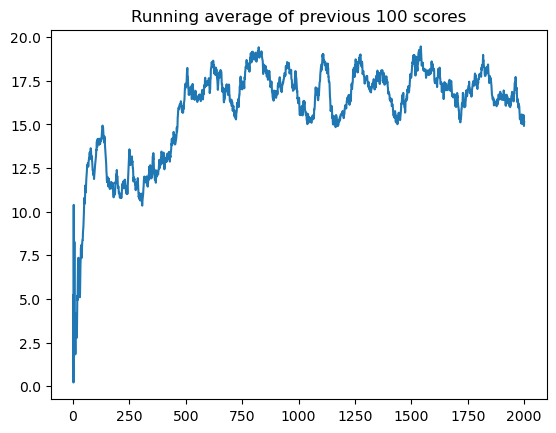

In [445]:
x = [i + 1 for i in range(len(score_history))]
plot_learning_curve(x, score_history)

In [3]:
import gym
from gym.spaces import Box, Discrete

# New Tests

In [3]:
from entsoe import EntsoePandasClient
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from import_data import aggregate_hourly, drop_incomplete_datapoints

In [4]:
# your_key = '9ab2e188-d454-44be-bce7-ea9dc8863723'
your_key = '3a72c137-c318-4dd5-ac00-2d3be87966a8'

country_code = 'DE_LU'  # Germany-Luxembourg

client = EntsoePandasClient(api_key=your_key)

In [7]:
start = pd.Timestamp(year=2022, month=1, day=1, tz="europe/brussels")
end = pd.Timestamp.now(tz="europe/brussels").floor('D') + pd.Timedelta(days=2)

In [190]:
# make api call
solar_actual = pd.DataFrame(client.query_generation(country_code, start=start, end=end, psr_type=None))

In [197]:
solar_actual

2022-01-01 00:00:00+01:00        0.0
2022-01-01 01:00:00+01:00        0.0
2022-01-01 02:00:00+01:00        0.0
2022-01-01 03:00:00+01:00        0.0
2022-01-01 04:00:00+01:00        0.0
                              ...   
2023-06-07 19:00:00+02:00    20665.0
2023-06-07 20:00:00+02:00     6540.0
2023-06-07 21:00:00+02:00      417.0
2023-06-07 22:00:00+02:00        1.0
2023-06-07 23:00:00+02:00        0.0
Name: Actual Aggregated, Length: 12480, dtype: float64

In [5]:
from import_data import get_solar_estimate

In [350]:
np.linspace(0,25,9)[8]

25.0